<a href="https://colab.research.google.com/github/AngelitaPrettyciaHarefa/AngelitaPrettyciaHarefa.github.io/blob/main/Code_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SCRAPING DATA ⚓

In [329]:
!pip install google-play-scraper

In [330]:
import json
import pandas as pd

from tqdm import tqdm
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter
from google_play_scraper import Sort, reviews, app

In [331]:
from google.colab import drive

drive.mount('/content/gDrive/', force_remount=True)
path = "gDrive/MyDrive/"

Mounted at /content/gDrive/


In [332]:
app_packages = [
    'com.simasmobile.co.id'
]

In [333]:
def print_json(json_object):
  json_str = json.dumps(
    json_object,
    indent=2,
    sort_keys=True,
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [334]:
app_reviews = []

for ap in tqdm(app_packages):
  rvs, continuation_token = reviews(
      ap,
      lang = 'id',
      country = 'id',
      sort = Sort.MOST_RELEVANT,
      count=1000,
      filter_score_with = None
      )
  app_reviews.extend(rvs)
  rvs, _ = reviews(
      ap,
      continuation_token=continuation_token
  )

print_json(app_reviews[13])

100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

{
  "appVersion": "3.0232",
  "at": "2023-05-02 03:50:03",
  "content": "sdh di update apk nya tambah jelek di buka.",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "3.0232",
  "reviewId": "6d8b8732-6bfa-407d-ac5f-363c2e1c5937",
  "score": 1,
  "thumbsUpCount": 0,
  "userImage": "https://play-lh.googleusercontent.com/a-/AD_cMMTbUIeDXjs8EURp_hSv1krEYKcPpP6_6LdxYGdwf0LEKQU",
  "userName": "Sahabat Teknik"
}



In [335]:
df_app_reviews = pd.DataFrame(app_reviews)
df_app_reviews = df_app_reviews.sort_values(by="at", ascending=False)
df_app_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
8,702fa3e8-ce43-4f46-b710-981552de78d6,Grace,https://play-lh.googleusercontent.com/a-/AD_cM...,UI nya kurang menarik,3,0,3.0241,2023-07-08 11:28:25,None,None,3.0241
3,e0046c85-ac3e-4f3a-9626-33af96dd6c01,Bayu Nurhan,https://play-lh.googleusercontent.com/a-/AD_cM...,Mau klaim aja ribet banget kebanyakan alasan h...,1,0,3.0240,2023-07-05 04:14:11,None,None,3.0240
103,6cc85dfc-616f-4447-bbab-e62ca44cfa3e,Yan Dhikusumah,https://play-lh.googleusercontent.com/a-/AD_cM...,Sangat memuaskan,5,0,3.0240,2023-07-04 09:59:44,None,None,3.0240
40,dc021800-bf6e-443d-9011-d5911eb34fa4,Rendy,https://play-lh.googleusercontent.com/a-/AD_cM...,Semoga ada fitur yg menarik lainnya 😁,5,0,3.0240,2023-07-03 16:22:15,None,None,3.0240
25,06aafc64-1655-4b9b-b755-8ed268ddc450,Indra Maulana,https://play-lh.googleusercontent.com/a/AAcHTt...,Aplikasi error dan lelet,1,0,3.0240,2023-06-21 23:49:13,None,None,3.0240


In [336]:
len(app_reviews)

483

In [337]:
df_app_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 8 to 445
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              483 non-null    object        
 1   userName              483 non-null    object        
 2   userImage             483 non-null    object        
 3   content               483 non-null    object        
 4   score                 483 non-null    int64         
 5   thumbsUpCount         483 non-null    int64         
 6   reviewCreatedVersion  407 non-null    object        
 7   at                    483 non-null    datetime64[ns]
 8   replyContent          0 non-null      object        
 9   repliedAt             0 non-null      object        
 10  appVersion            407 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 45.3+ KB


In [338]:
df_app_reviews = df_app_reviews[['content', 'score', 'at']]
df_app_reviews.head()

,content,score,at
8,UI nya kurang menarik,3,2023-07-08 11:28:25
3,Mau klaim aja ribet banget kebanyakan alasan h...,1,2023-07-05 04:14:11
103,Sangat memuaskan,5,2023-07-04 09:59:44
40,Semoga ada fitur yg menarik lainnya 😁,5,2023-07-03 16:22:15
25,Aplikasi error dan lelet,1,2023-06-21 23:49:13


In [339]:
df_app_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 8 to 445
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   content  483 non-null    object        
 1   score    483 non-null    int64         
 2   at       483 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 15.1+ KB


In [340]:
from datetime import datetime

def pecah_at(tanggal):
    hari = tanggal.day
    bulan = tanggal.month
    tahun = tanggal.year
    return hari, bulan, tahun

df_app_reviews[['hari', 'bulan', 'tahun']] = df_app_reviews['at'].apply(pecah_at).apply(pd.Series)

df_app_reviews.head()

,content,score,at,hari,bulan,tahun
8,UI nya kurang menarik,3,2023-07-08 11:28:25,8,7,2023
3,Mau klaim aja ribet banget kebanyakan alasan h...,1,2023-07-05 04:14:11,5,7,2023
103,Sangat memuaskan,5,2023-07-04 09:59:44,4,7,2023
40,Semoga ada fitur yg menarik lainnya 😁,5,2023-07-03 16:22:15,3,7,2023
25,Aplikasi error dan lelet,1,2023-06-21 23:49:13,21,6,2023


In [341]:
df_app_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 8 to 445
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   content  483 non-null    object        
 1   score    483 non-null    int64         
 2   at       483 non-null    datetime64[ns]
 3   hari     483 non-null    int64         
 4   bulan    483 non-null    int64         
 5   tahun    483 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 26.4+ KB


In [342]:
df_app_reviews.to_csv(path+'Reviews.csv', index=None, header=True)

# ANALISIS DESKRIPTIF ⚓



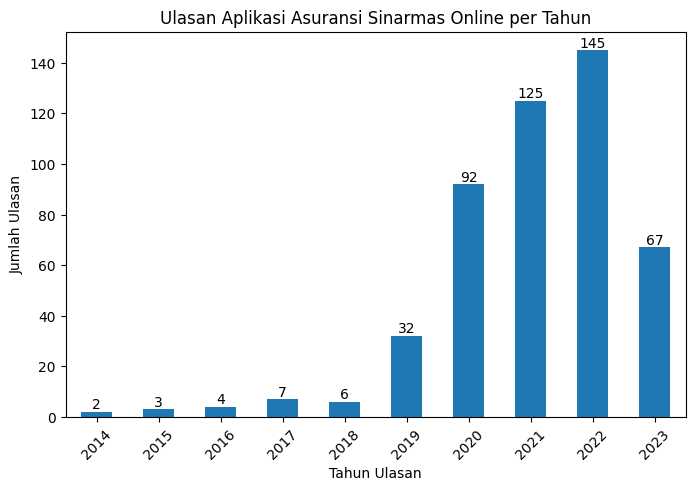

In [343]:
import matplotlib.pyplot as plt

total_ulasan_per_tahun = df_app_reviews['tahun'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
ax = total_ulasan_per_tahun.plot(kind='bar')

for i, v in enumerate(total_ulasan_per_tahun):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.title('Ulasan Aplikasi Asuransi Sinarmas Online per Tahun')
plt.xlabel('Tahun Ulasan')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=45)
plt.show()

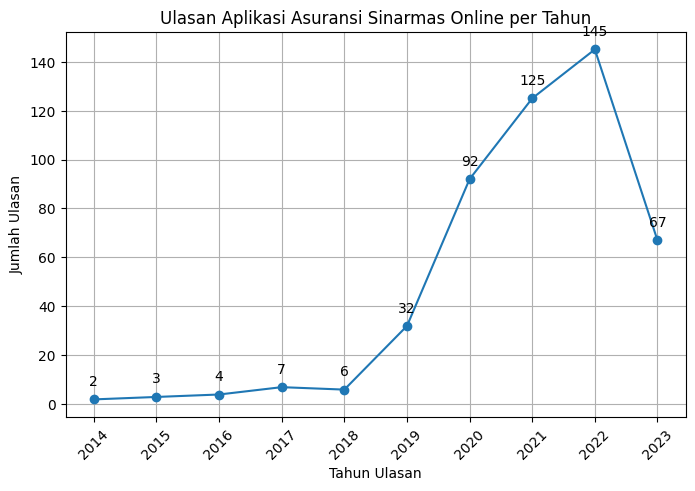

In [344]:
import matplotlib.pyplot as plt

total_ulasan_per_tahun = df_app_reviews['tahun'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.plot(total_ulasan_per_tahun.index, total_ulasan_per_tahun.values, marker='o', linestyle='-')
plt.title('Ulasan Aplikasi Asuransi Sinarmas Online per Tahun')
plt.xlabel('Tahun Ulasan')
plt.ylabel('Jumlah Ulasan')
plt.xticks(total_ulasan_per_tahun.index, rotation=45)
plt.grid(True)

for x, y in zip(total_ulasan_per_tahun.index, total_ulasan_per_tahun.values):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()

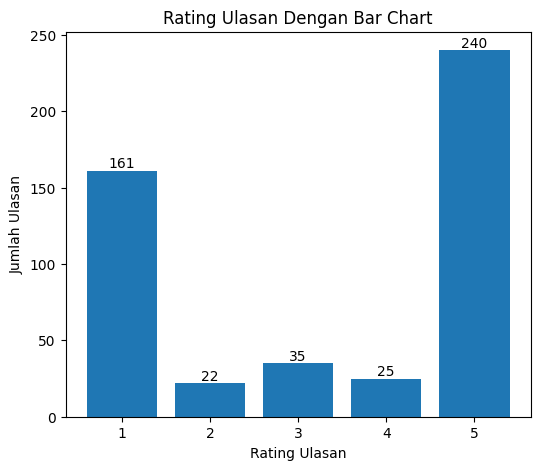

In [345]:
import matplotlib.pyplot as plt

data = df_app_reviews['score'].value_counts().sort_index()

plt.figure(figsize=(6, 5))
plt.bar(data.index, data.values)

for i, count in enumerate(data.values):
    plt.text(data.index[i], count, str(count), ha='center', va='bottom')

plt.xlabel('Rating Ulasan')
plt.ylabel('Jumlah Ulasan')
plt.title('Rating Ulasan Dengan Bar Chart')
plt.show()

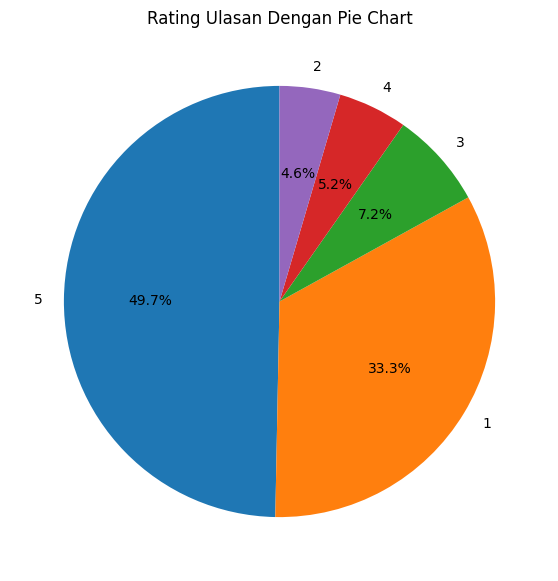

In [346]:
import matplotlib.pyplot as plt

data = df_app_reviews['score'].value_counts()
explode = [0, 0, 0, 0, 0]

plt.figure(figsize=(7, 7))
data.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=explode, label='')

plt.title('Rating Ulasan Dengan Pie Chart')
plt.show()

# TEXT PRE-PROCESSING ⚓

In [347]:
import pandas as pd
import numpy as np
import string
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [348]:
# =============== CLEANING ===============

# Menghapus URL
df_app_reviews['content_cleaning'] = df_app_reviews['content'].apply(lambda x: re.sub(r'http\S+|www\S+', '', str(x)))

# Menghapus mention
df_app_reviews['content_cleaning'] = df_app_reviews['content_cleaning'].apply(lambda x: re.sub(r'@\w+', '', str(x)))

# Menghapus hashtag
df_app_reviews['content_cleaning'] = df_app_reviews['content_cleaning'].apply(lambda x: re.sub(r'#\w+', '', str(x)))

# Menghapus tanda baca
df_app_reviews['content_cleaning'] = df_app_reviews['content_cleaning'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))

# Menghapus emotikon
df_app_reviews['content_cleaning'] = df_app_reviews['content_cleaning'].apply(lambda x: re.sub(r'[^\w\s\d]', '', str(x)))

# Menghapus angka
df_app_reviews['content_cleaning'] = df_app_reviews['content_cleaning'].apply(lambda x: re.sub(r'\d+', '', str(x)))

# Menghapus karakter tunggal
df_app_reviews['content_cleaning'] = df_app_reviews['content_cleaning'].apply(lambda x: re.sub(r'\b\w\b', '', str(x)))

# Menghapus spasi kosong di awal dan akhir
df_app_reviews['content_cleaning'] = df_app_reviews['content_cleaning'].str.strip()

# Menghapus banyak spasi putih menjadi satu spasi putih
df_app_reviews['content_cleaning'] = df_app_reviews['content_cleaning'].apply(lambda x: re.sub(r'\s+', ' ', str(x)))

df_app_reviews[['content_cleaning']].head()

,content_cleaning
8,UI nya kurang menarik
3,Mau klaim aja ribet banget kebanyakan alasan h...
103,Sangat memuaskan
40,Semoga ada fitur yg menarik lainnya
25,Aplikasi error dan lelet


In [349]:
# =============== CASE FOLDING ===============

def case_folding(text):
  text = text.lower()
  return text
df_app_reviews['content_case_folding'] = df_app_reviews['content_cleaning'].apply(case_folding)

df_app_reviews[['content_case_folding']].head()

,content_case_folding
8,ui nya kurang menarik
3,mau klaim aja ribet banget kebanyakan alasan h...
103,sangat memuaskan
40,semoga ada fitur yg menarik lainnya
25,aplikasi error dan lelet


In [350]:
# =============== TOKENIZING ===============

def tokenize(text):
    return word_tokenize(text)
df_app_reviews['content_tokens'] = df_app_reviews['content_case_folding'].apply(tokenize)

df_app_reviews[['content_tokens']].head()

,content_tokens
8,"[ui, nya, kurang, menarik]"
3,"[mau, klaim, aja, ribet, banget, kebanyakan, a..."
103,"[sangat, memuaskan]"
40,"[semoga, ada, fitur, yg, menarik, lainnya]"
25,"[aplikasi, error, dan, lelet]"


In [351]:
# ================ STOPWORDS REMOVAL ===============

nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = stopwords.words('indonesian')
list_stopwords = ['sinarmas']
stopwords.extend(list_stopwords)

def stopwords_removal(words):
    return [word for word in words if word not in stopwords]
df_app_reviews['content_stopwords_removal'] = df_app_reviews['content_tokens'].apply(stopwords_removal)

df_app_reviews[['content_stopwords_removal']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content_stopwords_removal
8,"[ui, nya, menarik]"
3,"[klaim, aja, ribet, banget, kebanyakan, alasan..."
103,[memuaskan]
40,"[semoga, fitur, yg, menarik]"
25,"[aplikasi, error, lelet]"


In [352]:
# =============== STEMMING ===============

!pip install Sastrawi
!pip install swifter

from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

In [353]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
  text = [stemmer.stem(word) for word in text]
  return text
df_app_reviews['content_stemmed'] = df_app_reviews['content_stopwords_removal'].swifter.apply(stemming)

df_app_reviews[['content_stemmed']].head()

Pandas Apply:   0%|          | 0/483 [00:00<?, ?it/s]

,content_stemmed
8,"[ui, nya, tarik]"
3,"[klaim, aja, ribet, banget, banyak, alas, gak,..."
103,[muas]
40,"[moga, fitur, yg, tarik]"
25,"[aplikasi, error, lelet]"


In [354]:
# =============== HAPUS KATA YANG MENGANDUNG 3 HURUF ATAU LEBIH SEDIKIT ===============

def remove_short_tokens(tokens):
    filtered_tokens = [token for token in tokens if len(token) > 3]
    return filtered_tokens

df_app_reviews['content_filtered'] = df_app_reviews['content_stemmed'].apply(remove_short_tokens)
df_app_reviews['content_filtered'] = df_app_reviews['content_filtered'].apply(lambda tokens: ' '.join(tokens))

df_app_reviews[['content_filtered']].head()

,content_filtered
8,tarik
3,klaim ribet banget banyak alas sulit proses kl...
103,muas
40,moga fitur tarik
25,aplikasi error lelet


In [355]:
df_app_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 8 to 445
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   content                    483 non-null    object        
 1   score                      483 non-null    int64         
 2   at                         483 non-null    datetime64[ns]
 3   hari                       483 non-null    int64         
 4   bulan                      483 non-null    int64         
 5   tahun                      483 non-null    int64         
 6   content_cleaning           483 non-null    object        
 7   content_case_folding       483 non-null    object        
 8   content_tokens             483 non-null    object        
 9   content_stopwords_removal  483 non-null    object        
 10  content_stemmed            483 non-null    object        
 11  content_filtered           483 non-null    object        
dtypes: datet

In [356]:
df_app_reviews.to_csv(path+"Hasil_Text_Preprocessing.csv", index=None, header=True)

# PELABELAN ⚓

In [357]:
df_app_reviews['score'].value_counts()

5    240
1    161
3     35
4     25
2     22
Name: score, dtype: int64

In [358]:
label = []

for i, row in df_app_reviews.iterrows():
  if row['score'] > 3:
    label.append(1)
  elif row['score'] < 3:
    label.append(-1)
  else:
    label.append(0)

df_app_reviews['label'] = label

df_app_reviews[['content_filtered', 'score','label']].head()

,content_filtered,score,label
8,tarik,3,0
3,klaim ribet banget banyak alas sulit proses kl...,1,-1
103,muas,5,1
40,moga fitur tarik,5,1
25,aplikasi error lelet,1,-1


In [359]:
df_app_reviews['label'].value_counts(normalize=False)

 1    265
-1    183
 0     35
Name: label, dtype: int64

In [360]:
df_app_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 8 to 445
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   content                    483 non-null    object        
 1   score                      483 non-null    int64         
 2   at                         483 non-null    datetime64[ns]
 3   hari                       483 non-null    int64         
 4   bulan                      483 non-null    int64         
 5   tahun                      483 non-null    int64         
 6   content_cleaning           483 non-null    object        
 7   content_case_folding       483 non-null    object        
 8   content_tokens             483 non-null    object        
 9   content_stopwords_removal  483 non-null    object        
 10  content_stemmed            483 non-null    object        
 11  content_filtered           483 non-null    object        
 12  label   

# VISUALISASI ⚓

WORDCLOUD

In [361]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

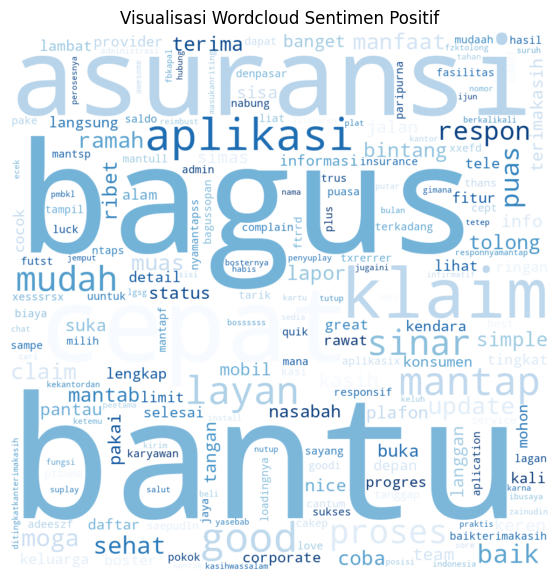

In [362]:
# Sentimen == 1 Positif
train_positif = df_app_reviews[df_app_reviews['label'] == 1]
all_text_positif = ' '.join(map(str, [word for word in train_positif['content_filtered']]))
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA',
                      background_color='white').generate(all_text_positif)

plt.figure(figsize=(7,7))
plt.title('Visualisasi Wordcloud Sentimen Positif')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

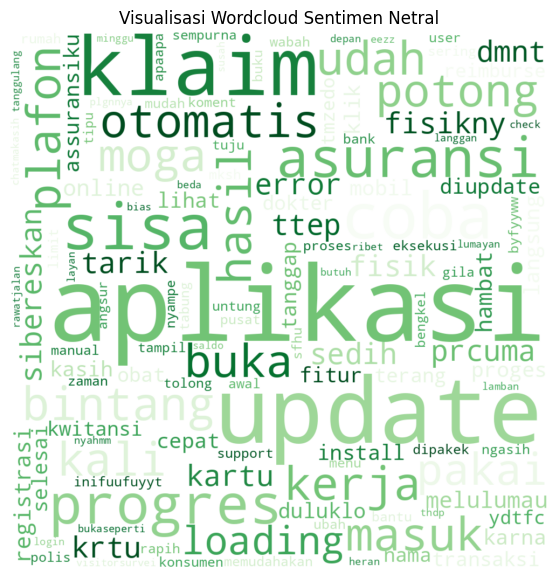

In [363]:
# Sentimen == 0 Netral
train_netral = df_app_reviews[df_app_reviews["label"] == 0]
all_text_netral = ' '.join(map(str, [word for word in train_netral["content_filtered"]]))
wordcloud = WordCloud(colormap='Greens', width=1000, height=1000, mode='RGBA',
                      background_color='white').generate(all_text_netral)

plt.figure(figsize=(7, 7))
plt.title('Visualisasi Wordcloud Sentimen Netral')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

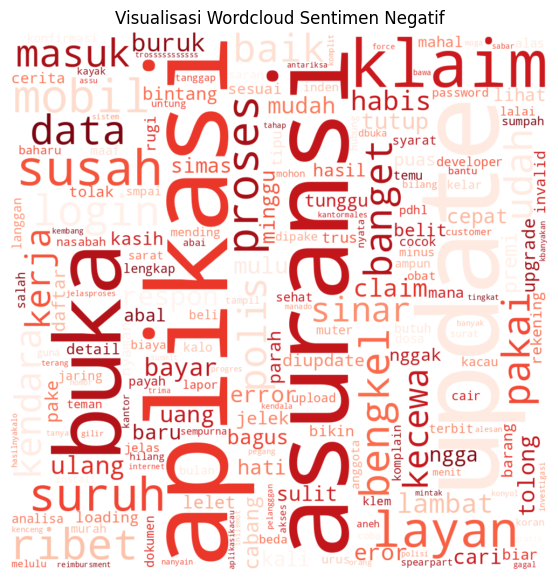

In [364]:
# Sentimen == -1 Negatif
train_negatif = df_app_reviews[df_app_reviews["label"] == -1]
all_text_negatif = ' '.join(map(str, [word for word in train_negatif["content_filtered"]]))
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA',
                      background_color='white').generate(all_text_negatif)

plt.figure(figsize=(7,7))
plt.title('Visualisasi Wordcloud Sentimen Negatif')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

BAR CHART

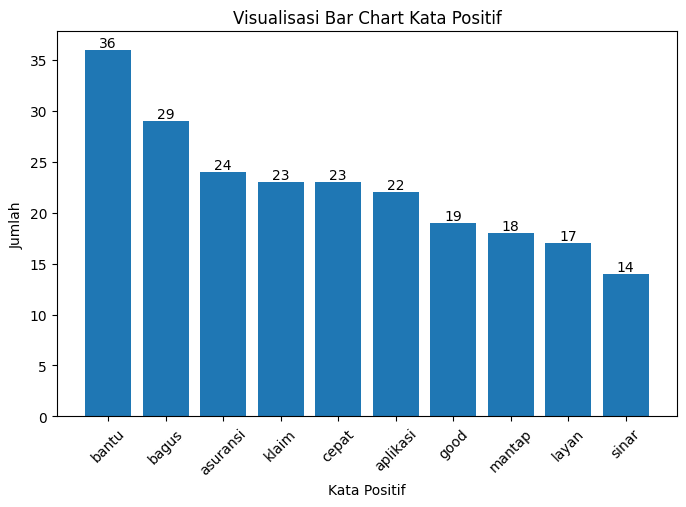

In [365]:
import matplotlib.pyplot as plt

train_positif = df_app_reviews[df_app_reviews['label'] == 1]
ulasan_concat = ' '.join(map(str, [word for word in train_positif['content_filtered']]))
kata = ulasan_concat.split()
frekuensi_kata = pd.Series(kata).value_counts()
kata_terbanyak = frekuensi_kata.head(10)

plt.figure(figsize=(8, 5))
plt.bar(kata_terbanyak.index, kata_terbanyak.values, align='center')
plt.title('Visualisasi Bar Chart Kata Positif')
plt.xlabel('Kata Positif')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

for i, v in enumerate(kata_terbanyak.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

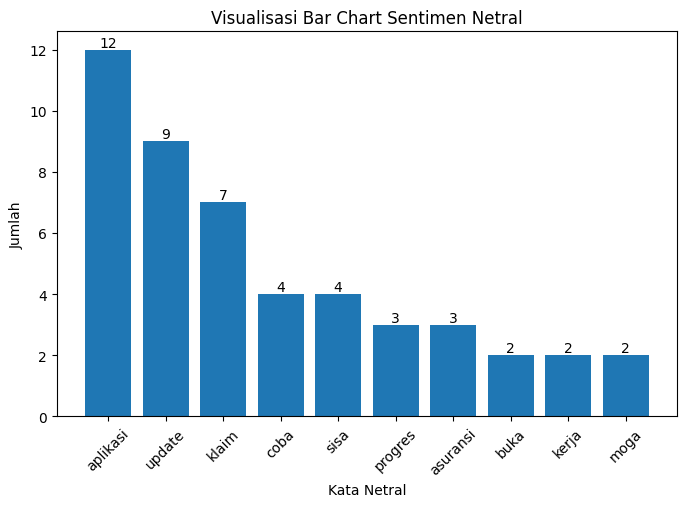

In [366]:
import matplotlib.pyplot as plt

train_positif = df_app_reviews[df_app_reviews['label'] == 0]
ulasan_concat = ' '.join(map(str, [word for word in train_positif['content_filtered']]))
kata = ulasan_concat.split()
frekuensi_kata = pd.Series(kata).value_counts()
kata_terbanyak = frekuensi_kata.head(10)

plt.figure(figsize=(8, 5))
plt.bar(kata_terbanyak.index, kata_terbanyak.values, align='center')
plt.title('Visualisasi Bar Chart Sentimen Netral')
plt.xlabel('Kata Netral')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

for i, v in enumerate(kata_terbanyak.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

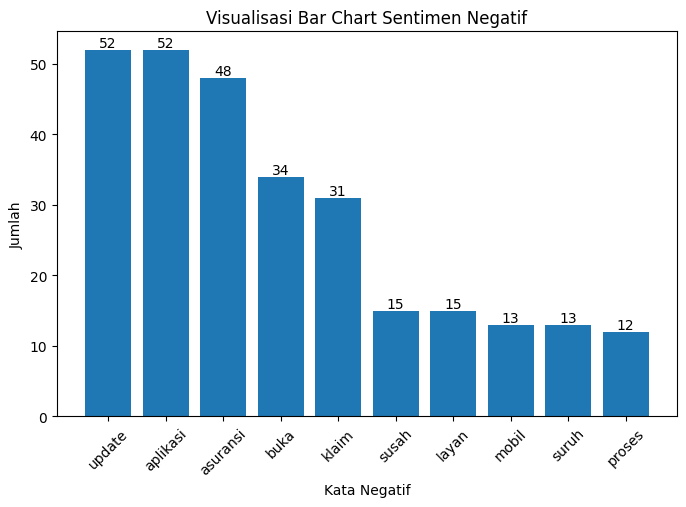

In [367]:
import matplotlib.pyplot as plt

train_positif = df_app_reviews[df_app_reviews['label'] == -1]
ulasan_concat = ' '.join(map(str, [word for word in train_positif['content_filtered']]))
kata = ulasan_concat.split()
frekuensi_kata = pd.Series(kata).value_counts()
kata_terbanyak = frekuensi_kata.head(10)

plt.figure(figsize=(8, 5))
plt.bar(kata_terbanyak.index, kata_terbanyak.values, align='center')
plt.title('Visualisasi Bar Chart Sentimen Negatif')
plt.xlabel('Kata Negatif')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

for i, v in enumerate(kata_terbanyak.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

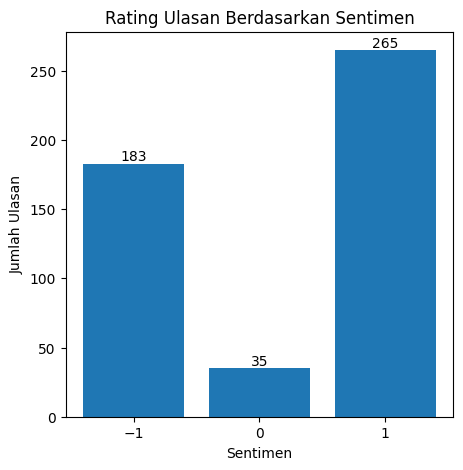

In [368]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
rating_counts = df_app_reviews['label'].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values)

for i, count in enumerate(rating_counts.values):
    plt.text(rating_counts.index[i], count, str(count), ha='center', va='bottom')

plt.xticks([-1, 0, 1])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.title('Rating Ulasan Berdasarkan Sentimen')
plt.show()

<Figure size 1000x600 with 0 Axes>

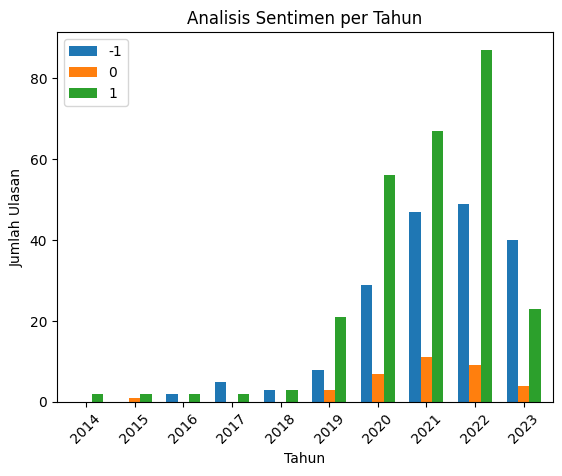

In [369]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
grouped_data = df_app_reviews.groupby(['tahun', 'label'])['score'].count().unstack()

grouped_data.plot(kind='bar', stacked=False, width=0.7)
plt.title('Analisis Sentimen per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

PIE CHART

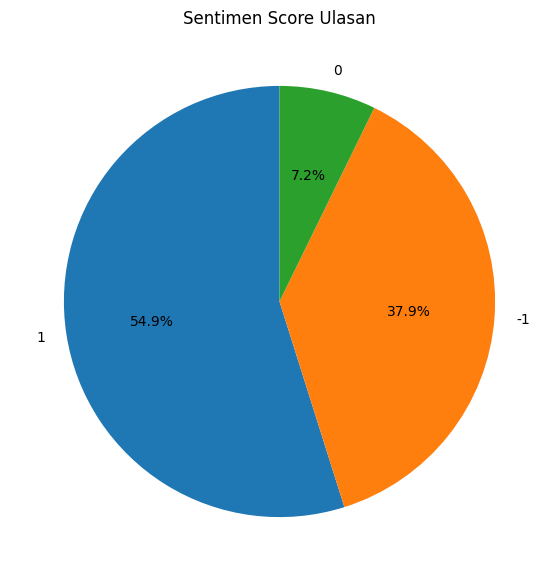

In [370]:
import matplotlib.pyplot as plt

data = df_app_reviews['label'].value_counts()
explode = [0, 0, 0]

plt.figure(figsize=(7, 7))
data.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=explode, label='')

plt.title('Sentimen Score Ulasan')
plt.show()

# TF-IDF ⚓

In [371]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = TfidfVectorizer()
text_tf = vectorizer.fit_transform(df_app_reviews['content_filtered'].astype('U'))

print(text_tf)

  (0, 663)	1.0
  (1, 217)	0.38294796786662144
  (1, 45)	0.17934519410046476
  (1, 66)	0.3090155226421851
  (1, 525)	0.23389080434638582
  (1, 637)	0.328872603214593
  (1, 16)	0.35901923781194
  (1, 61)	0.38294796786662144
  (1, 57)	0.2724826081817265
  (1, 564)	0.25665087225611793
  (1, 322)	0.38363141597051564
  (2, 434)	1.0
  (3, 195)	0.5813914528398095
  (3, 431)	0.5090757567709525
  (3, 663)	0.6346856327607374
  (4, 363)	0.6988480750224934
  (4, 187)	0.6313704094522653
  (4, 35)	0.336129103330007
  (5, 657)	0.8458033611134981
  (5, 50)	0.5334947744159352
  (6, 89)	0.3799737921502431
  (6, 382)	0.4637161339301511
  (6, 550)	0.494622940647365
  (6, 617)	0.494622940647365
  (6, 297)	0.3889518705219768
  :	:
  (475, 716)	0.5732888878959423
  (475, 722)	0.3740659856743834
  (476, 333)	0.4826246082720065
  (476, 631)	0.4144740920863691
  (476, 169)	0.452467524443037
  (476, 390)	0.38944845796152133
  (476, 589)	0.3707565652942119
  (476, 35)	0.20733464699656176
  (476, 322)	0.24174297475

In [372]:
vectorizer.get_feature_names_out()

array(['abai', 'abal', 'abdet', 'abis', 'accyg', 'adeeszf', 'admin',
       'administrasi', 'ajak', 'ajamndng', 'ajar', 'akhirat', 'akses',
       'aktif', 'alam', 'alamat', 'alas', 'alesan', 'alfa', 'alfiansyah',
       'alias', 'ambil', 'amburadul', 'ampun', 'anak', 'analisa',
       'analisis', 'aneh', 'anggota', 'angsur', 'anjg', 'antariksa',
       'apaapa', 'apknya', 'aplication', 'aplikasi', 'aplikasikacau',
       'aplikasike', 'aplikasix', 'apps', 'area', 'asetelah', 'asosiasi',
       'assu', 'assuransiku', 'asuransi', 'asuransiny',
       'asuransisinarmaspalingok', 'awal', 'awesome', 'bagus',
       'bagussopan', 'baharu', 'baik', 'baikterimakasih', 'bakalanhati',
       'bandung', 'banget', 'bangetproses', 'bank', 'bantu', 'banyak',
       'barang', 'baret', 'baru', 'bawa', 'bayar', 'beban', 'beda',
       'begituu', 'beli', 'belit', 'bener', 'bengkel', 'bentar',
       'berbelitgak', 'beres', 'berkah', 'berkalikali', 'berress',
       'berulangkali', 'besok', 'best', 'bia

In [373]:
text_tf.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [374]:
print(text_tf.todense().shape)

(483, 747)


In [375]:
import pandas as pd

df_tfidf = pd.DataFrame(text_tf.todense().T, index=vectorizer.get_feature_names_out(),
                  columns=[f'D{i+1}' for i in range(len(df_app_reviews['content_filtered']))])

df_tfidf.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D474,D475,D476,D477,D478,D479,D480,D481,D482,D483
abai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abdet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
accyg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# OVERSAMPLING ⚓

In [376]:
from imblearn.over_sampling import SMOTE

y = df_app_reviews['label']

sm = SMOTE(random_state = 2)
x_train_sm, y_train_sm = sm.fit_resample(text_tf, y)

print("Before Oversampling Shape of x : {}".format(text_tf.shape))
print("Before Oversampling Shape of y : {} \n".format(y.shape))

print("Before Oversampling Positif : {}".format(sum(y == 1)))
print("Before Oversampling Netral : {}".format(sum(y == 0)))
print("Before Oversampling Negatif : {} \n".format(sum(y == -1)))

print("After Oversampling Shape of x : {}".format(x_train_sm.shape))
print("After Oversampling Shape of y : {} \n".format(y_train_sm.shape))

print("After Oversampling Positif : {}".format(sum(y_train_sm == 1)))
print("After Oversampling Netral : {}".format(sum(y_train_sm == 0)))
print("After Oversampling Negatif : {}".format(sum(y_train_sm == -1)))

Before Oversampling Shape of x : (483, 747)
Before Oversampling Shape of y : (483,) 

Before Oversampling Positif : 265
Before Oversampling Netral : 35
Before Oversampling Negatif : 183 

After Oversampling Shape of x : (795, 747)
After Oversampling Shape of y : (795,) 

After Oversampling Positif : 265
After Oversampling Netral : 265
After Oversampling Negatif : 265


# DATA TRAINING DAN DATA TESTING ⚓

In [377]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train_sm, y_train_sm,
                                                    test_size=0.2, random_state=42)

print("Jumlah data training:", x_train.shape[0])
print("Jumlah data testing:", x_test.shape[0])

Jumlah data training: 636
Jumlah data testing: 159


# SVM ⚓

In [378]:
from sklearn import svm
from sklearn.metrics import accuracy_score

svm = svm.SVC(kernel='linear').fit(x_train, y_train)
predicted = svm.predict(x_test)

# Menghitung dan mencetak akurasi
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

Accuracy: 0.8616352201257862


# CONFUSION MATRIX ⚓

In [379]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung dan mencetak akurasi
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Menghitung dan mencetak presisi
precision = precision_score(y_test, predicted, average='macro')
print("Precision:", precision)

# Menghitung dan mencetak recall
recall = recall_score(y_test, predicted, average='macro')
print("Recall:", recall)

# Menghitung dan mencetak f1-score
f1 = f1_score(y_test, predicted, average='macro')
print("F1-score:", f1)

# Menghitung dan mencetak Confusion Matrix
cm = confusion_matrix(y_test, predicted)
print(f"Confusion Matrix:")
print(cm)

print(classification_report(y_test, predicted, zero_division=0))

Accuracy: 0.8616352201257862
Precision: 0.8674463937621831
Recall: 0.864135158626684
F1-score: 0.8610369981826221
Confusion Matrix:
[[42  0  6]
 [ 7 48  4]
 [ 5  0 47]]
              precision    recall  f1-score   support

          -1       0.78      0.88      0.82        48
           0       1.00      0.81      0.90        59
           1       0.82      0.90      0.86        52

    accuracy                           0.86       159
   macro avg       0.87      0.86      0.86       159
weighted avg       0.88      0.86      0.86       159



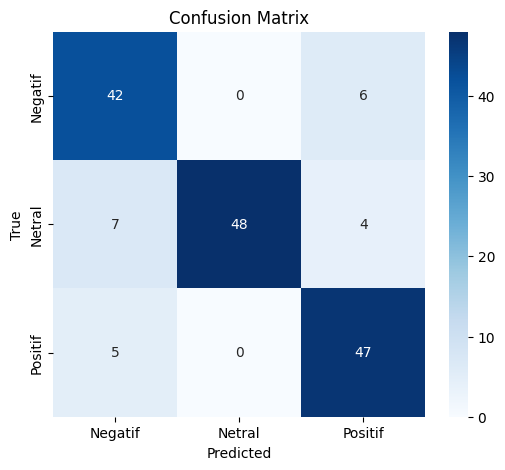

In [380]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()